我们来一次对微分方程在数学建模中的应用的深度、可视化的探索。我会为你详细解释三个在数模竞赛中“出镜率”最高的微分方程模型，并为每一个模型提供一个清晰的Python绘图示例，让你直观地看到它们所描述的动态世界。

一、 Malthus 模型 vs. Logistic 模型：从“乌托邦”到“现实世界”

这两个模型是描述种群增长最基础、也最重要的模型。它们共同回答了这个问题：“一个孤立的种群，其数量会如何随时间变化？”

1. Malthus 模型 (马尔萨斯模型) - 无限增长的乌托邦
   
核心思想/机理：
在一个资源无限、空间无限、没有天敌的理想环境中，种群的增长速度（dP/dt，即每单位时间新增的人口）只取决于当前的人口基数 P 和一个固有的增长率 r。人口越多，生得越多，增长得越快。
微分方程：
dP/dt = r * P
P(t): 时间 t 时的种群数量
r: 固有增长率 (一个常数，等于出生率 - 死亡率)
解析解：
这是一个最简单的一阶线性常微分方程，其解为指数函数：P(t) = P₀ * e^(rt)，其中 P₀ 是初始种群数量。

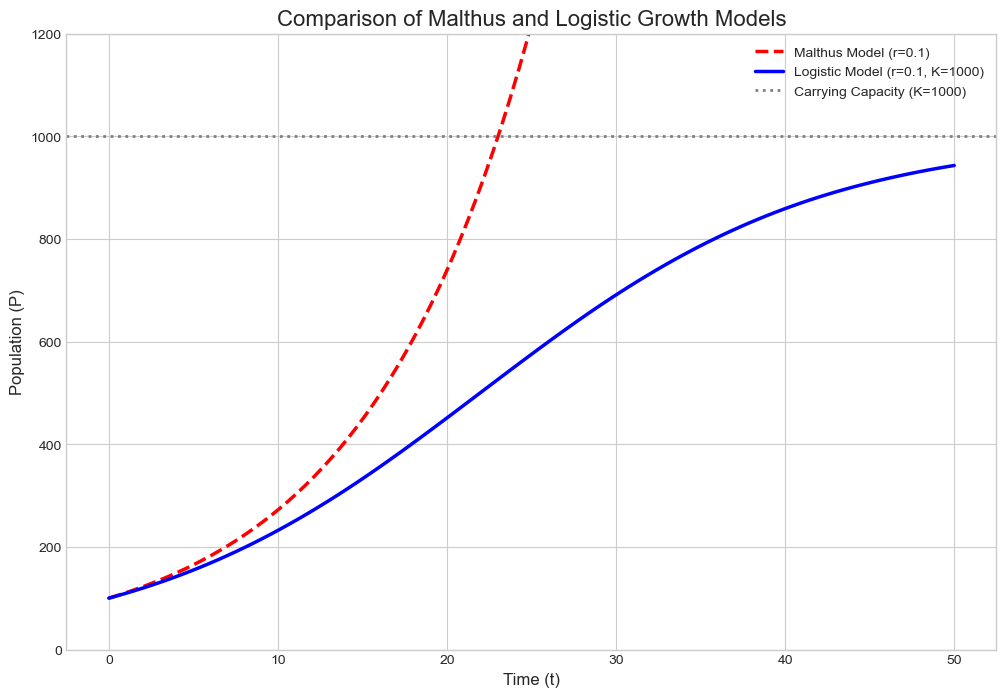

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- Malthus 模型 ---
# 参数
r = 0.1  # 固有增长率 (10%)
P0 = 100 # 初始种群数量
t_span = [0, 50] # 时间范围：0到50年
t_eval = np.linspace(t_span[0], t_span[1], 100) # 评估时间的点

# 微分方程定义
def malthus_model(t, P):
    return r * P

# 使用scipy的ode求解器求解
sol_malthus = solve_ivp(malthus_model, t_span, [P0], dense_output=True, t_eval=t_eval)

# --- Logistic 模型 ---
# 参数
K = 1000 # 环境承载力
# 微分方程定义
def logistic_model(t, P):
    return r * P * (1 - P / K)

# 求解
sol_logistic = solve_ivp(logistic_model, t_span, [P0], dense_output=True, t_eval=t_eval)

# --- 绘图对比 ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# 绘制Malthus曲线
plt.plot(sol_malthus.t, sol_malthus.y[0], label=f'Malthus Model (r={r})', color='red', linestyle='--', linewidth=2.5)

# 绘制Logistic曲线
plt.plot(sol_logistic.t, sol_logistic.y[0], label=f'Logistic Model (r={r}, K={K})', color='blue', linewidth=2.5)

# 绘制环境承载力K
plt.axhline(y=K, color='gray', linestyle=':', label=f'Carrying Capacity (K={K})', linewidth=2)

plt.title('Comparison of Malthus and Logistic Growth Models', fontsize=16)
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('Population (P)', fontsize=12)
plt.legend(fontsize=10)
plt.ylim(0, K * 1.2) # y轴范围略大于K
plt.grid(True)
plt.show()



二、 SIR 模型：描绘传染病的传播之舞

这是在数模竞赛中模拟疫情传播的标准模型。它用一个常微分方程组来描述人群在不同健康状态之间的流动。

核心思想/机理：
将总人口 N 分为三个“仓室”：

S (Susceptible)：易感者，健康但可能被感染。
I (Infectious)：感染者，具有传染性。
R (Recovered/Removed)：康复者（或死亡者），已免疫，不再参与传播。
病毒的传播过程，就是人群在这三个仓室之间按照一定的速率进行转移的过程。

微分方程组 (ODE System)：
dS/dt = -β * S * I / N: 易感者的减少速率，正比于易感者数量 S、感染者数量 I 和一个传播系数 β 的乘积。
dI/dt = β * S * I / N - γ * I: 感染者的变化速率，等于新增的感染者（从S转来）减去正在康复的感染者。康复速率正比于当前感染者数 I 和康复率 γ。
dR/dt = γ * I: 康复者的增加速率，等于正在康复的感染者数量。

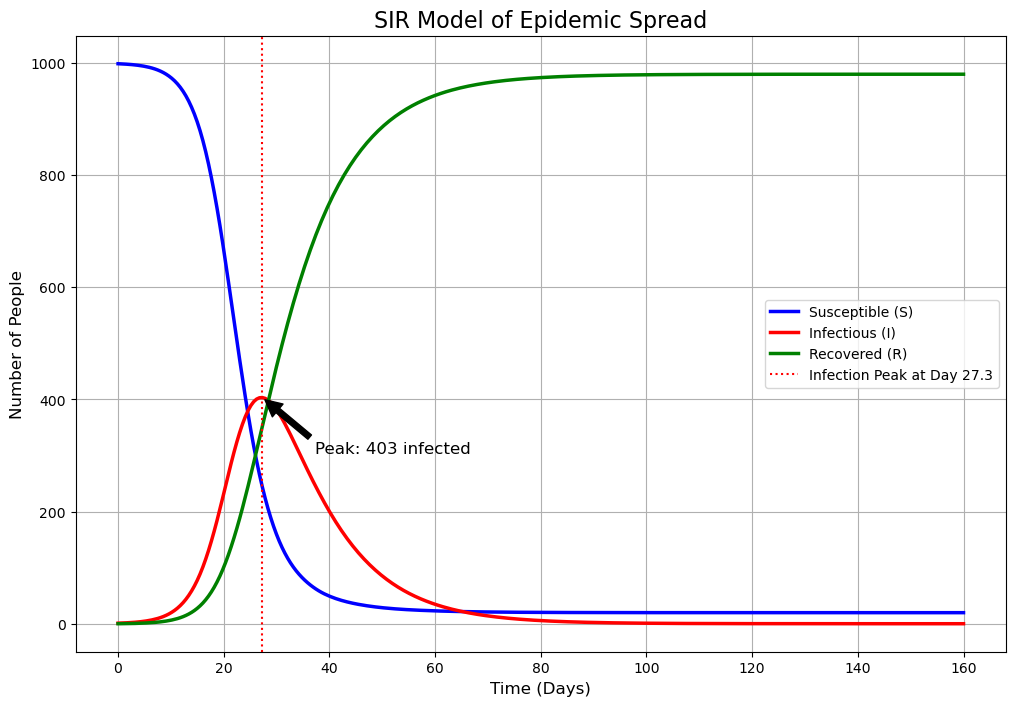

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- SIR 模型 ---
# 参数
N = 1000  # 总人口
I0 = 1    # 初始感染者
R0 = 0    # 初始康复者
S0 = N - I0 - R0 # 初始易感者

beta = 0.4  # 传播系数 (每个感染者每天有效接触并传染的人数)
gamma = 0.1 # 康复率 (1/康复所需天数，这里是1/10)

t_span = [0, 160] # 模拟160天
t_eval = np.linspace(t_span[0], t_span[1], 300)

# 微分方程组定义
# y 是一个向量 [S, I, R]
def sir_model(t, y):
    S, I, R = y
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# 初始条件向量
y0 = [S0, I0, R0]

# 求解
sol_sir = solve_ivp(sir_model, t_span, y0, t_eval=t_eval)

# --- 绘图 ---
plt.figure(figsize=(12, 8))
plt.plot(sol_sir.t, sol_sir.y[0], label='Susceptible (S)', color='blue', linewidth=2.5)
plt.plot(sol_sir.t, sol_sir.y[1], label='Infectious (I)', color='red', linewidth=2.5)
plt.plot(sol_sir.t, sol_sir.y[2], label='Recovered (R)', color='green', linewidth=2.5)

# 标记感染高峰
peak_infection_time = sol_sir.t[np.argmax(sol_sir.y[1])]
peak_infection_value = np.max(sol_sir.y[1])
plt.axvline(x=peak_infection_time, color='red', linestyle=':', lw=1.5, label=f'Infection Peak at Day {peak_infection_time:.1f}')
plt.annotate(f'Peak: {peak_infection_value:.0f} infected', 
             xy=(peak_infection_time, peak_infection_value),
             xytext=(peak_infection_time + 10, peak_infection_value - 100),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.title('SIR Model of Epidemic Spread', fontsize=16)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

图像解读：

蓝色曲线 (S)：易感者数量。一开始几乎是全部人口，随着疫情发展被不断“消耗”，最终稳定在一个较低水平。
红色曲线 (I)：感染者数量。这是我们最关心的曲线。它从一个很低的初始值开始，经历指数级增长，达到一个高峰，然后随着易感者减少和康复者增多而逐渐下降，最终趋于零。
绿色曲线 (R)：康复者数量。它单调递增，最终稳定在一个值，代表了最终被感染过的总人口。

重要应用：通过调整 beta（代表隔离措施的有效性）和 gamma（代表医疗水平），我们可以模拟不同防疫政策对“压平感染曲线”的效果。

三、 牛顿冷却定律：描述温度的衰减

这是一个简单但应用广泛的物理模型，描述了一个物体在恒温环境中温度如何变化。

核心思想/机理：
一个热的物体放在一个冷的环境中，它的冷却速度（温度对时间的导数 dT/dt）与物体当前温度 T 和环境温度 T_env 之间的温差成正比。温差越大，冷得越快。

微分方程：
dT/dt = -k * (T - T_env)
T(t): 物体在时间 t 时的温度
T_env: 恒定的环境温度
k: 冷却系数（一个正数，取决于物体的材料、表面积等）

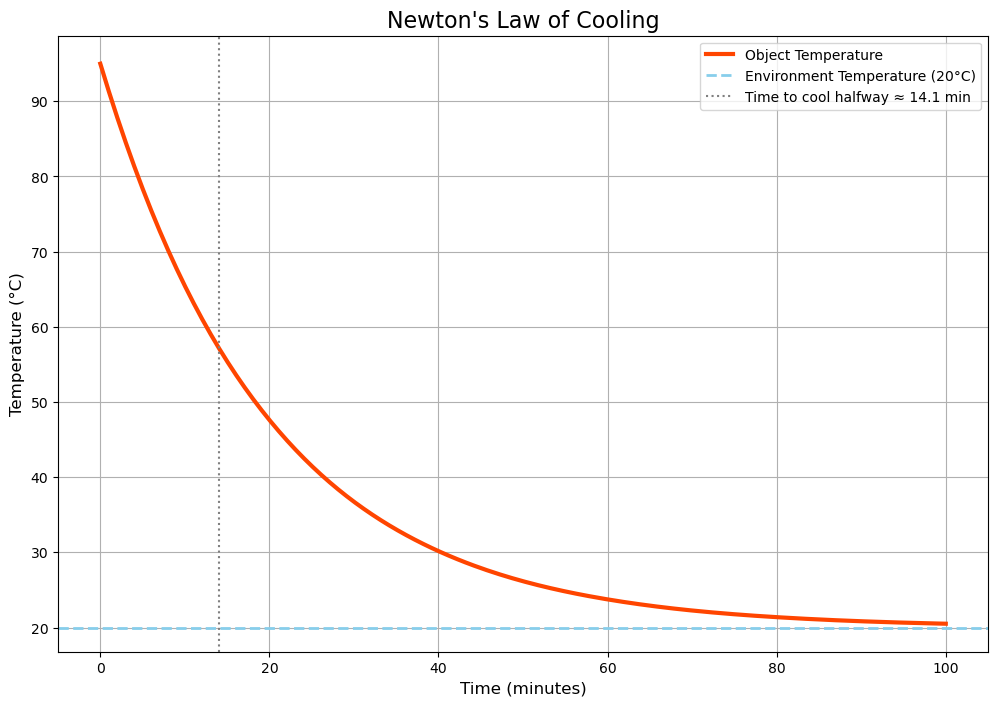

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- 牛顿冷却定律模型 ---
# 参数
T0 = 95     # 初始温度 (一杯热水)
T_env = 20  # 环境温度 (室温)
k = 0.05    # 冷却系数

t_span = [0, 100] # 模拟100分钟
t_eval = np.linspace(t_span[0], t_span[1], 200)

# 微分方程定义
def newton_cooling(t, T):
    return -k * (T - T_env)

# 求解
sol_cooling = solve_ivp(newton_cooling, t_span, [T0], t_eval=t_eval)

# --- 绘图 ---
plt.figure(figsize=(12, 8))
plt.plot(sol_cooling.t, sol_cooling.y[0], label='Object Temperature', color='orangered', linewidth=3)
plt.axhline(y=T_env, color='skyblue', linestyle='--', label=f'Environment Temperature ({T_env}°C)', linewidth=2)

# 标记半衰期类似的点
half_temp_diff = (T0 - T_env) / 2 + T_env
half_time_index = np.where(sol_cooling.y[0] <= half_temp_diff)[0][0]
half_time = sol_cooling.t[half_time_index]
plt.axvline(x=half_time, color='gray', linestyle=':', label=f'Time to cool halfway ≈ {half_time:.1f} min')

plt.title('Newton\'s Law of Cooling', fontsize=16)
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

图像解读：

橙红色曲线：物体的温度。它从初始的95度开始，迅速下降（因为初期温差大），然后下降速度越来越慢，最终渐近地趋近于蓝色的环境温度线20度。这是一个典型的指数衰减过程。
应用：这个模型可以用于法医学（估算死亡时间）、化学工程（反应釜温度控制）、烹饪等多种场景。

四、 Lotka-Volterra 模型：捕食者与被捕食者的“相爱相杀”

这个模型是生态学中最著名的模型之一，它用一个简单的微分方程组，描绘了一出捕食者（如狼）与被捕食者（如兔子）之间永恒的、周期性的戏剧。

核心思想/机理：
兔子的命运：如果没有狼，兔子会指数级增长。但是，兔子被狼吃掉的速率，正比于兔子和狼相遇的次数（即两者数量的乘积）。
. 狼的命运：如果没有兔子吃，狼会饿死（指数级衰减）。但是，狼的增长率，正比于它们吃了多少兔子（也与两者数量的乘积有关）。
微分方程组 (ODE System)：

dx/dt = α*x - β*x*y (兔子 x 的变化)
dy/dt = δ*x*y - γ*y (狼 y 的变化)
α, β, δ, γ 都是正常数，代表兔子的出生率、被捕食率、狼的繁殖率和死亡率。

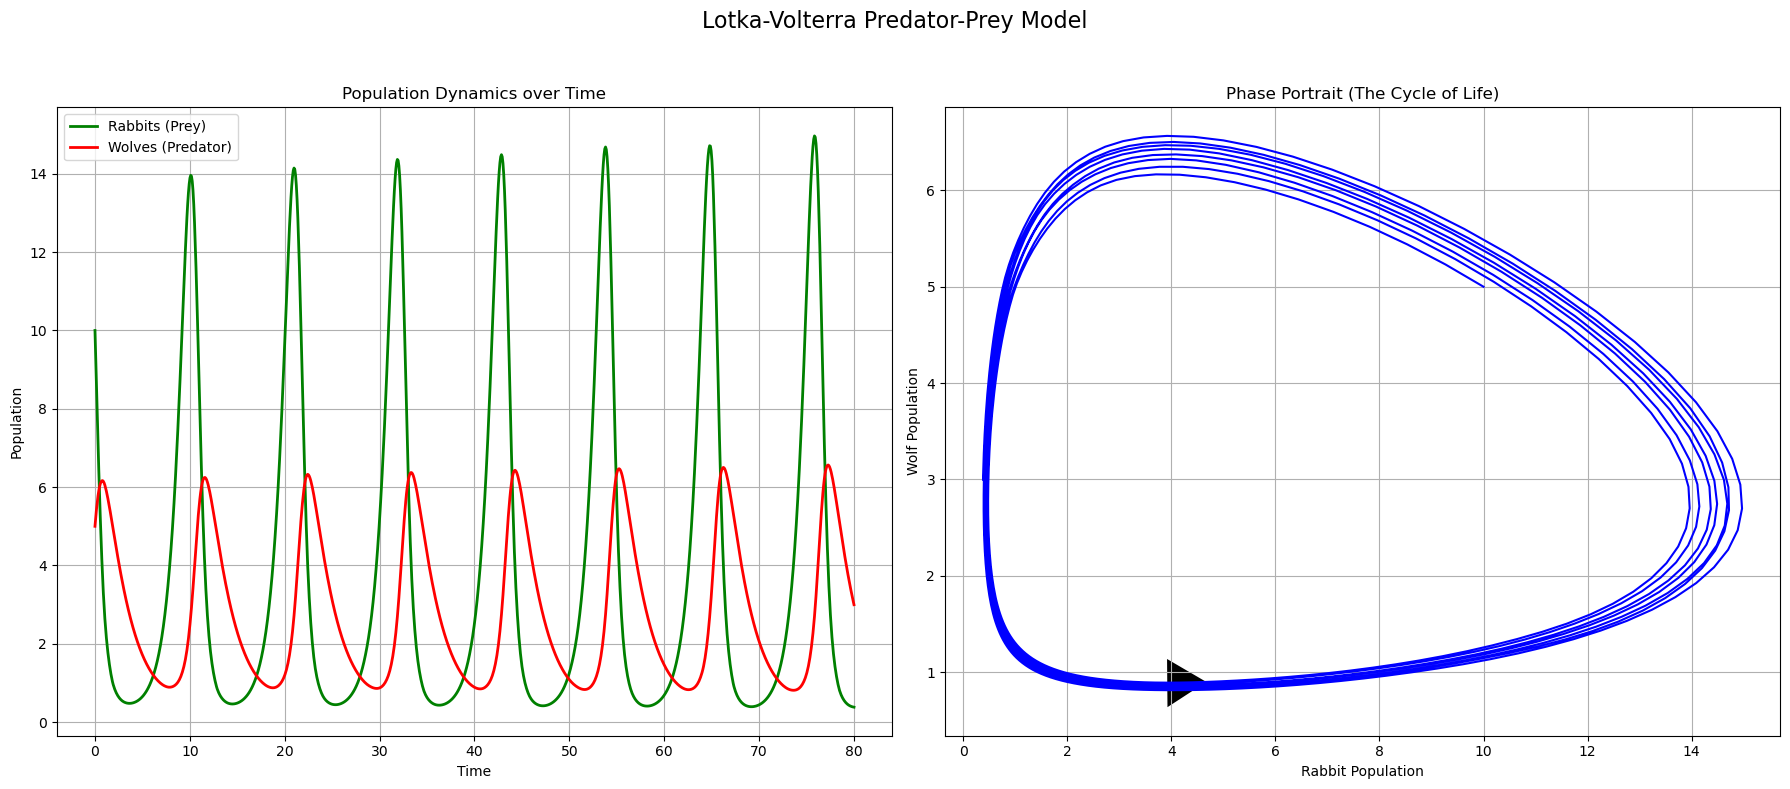

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- Lotka-Volterra 模型 ---
# 参数
alpha = 1.1  # 兔子的自然增长率
beta = 0.4   # 兔子被狼捕食的速率
delta = 0.1  # 狼吃了兔子后的增长率
gamma = 0.4  # 狼的自然死亡率

# 初始种群
x0 = 10  # 初始兔子数量
y0 = 5   # 初始狼的数量

t_span = [0, 80]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# 微分方程组定义
def lotka_volterra(t, z):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# 求解
sol = solve_ivp(lotka_volterra, t_span, [x0, y0], t_eval=t_eval)

# --- 绘图 ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Lotka-Volterra Predator-Prey Model', fontsize=16)

# 图1: 时间序列图
ax1.plot(sol.t, sol.y[0], label='Rabbits (Prey)', color='green', lw=2)
ax1.plot(sol.t, sol.y[1], label='Wolves (Predator)', color='red', lw=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax1.set_title('Population Dynamics over Time')
ax1.legend()
ax1.grid(True)

# 图2: 相图 (Phase Portrait)
ax2.plot(sol.y[0], sol.y[1], color='blue', lw=1.5)
# 绘制一个箭头表示轨迹方向
ax2.arrow(sol.y[0][100], sol.y[1][100], 
          sol.y[0][101]-sol.y[0][100], sol.y[1][101]-sol.y[1][100], 
          shape='full', lw=0, length_includes_head=True, head_width=.5, color='black')
ax2.set_xlabel('Rabbit Population')
ax2.set_ylabel('Wolf Population')
ax2.set_title('Phase Portrait (The Cycle of Life)')
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

图像解读：

左图（时间序列）：完美地展示了两个种群的周期性波动。你会看到狼的数量峰值总是滞后于兔子的数量峰值。逻辑是：兔子多 -> 狼食物充足，狼开始增多 -> 狼太多，兔子被大量捕食，数量下降 -> 兔子太少，狼食物不足，狼开始饿死 -> 狼太少，兔子天敌消失，数量再次回升... 循环往复。
右图（相图）：这是一个更深刻的视图。它展示了这个生态系统永远在一个封闭的循环中演化，永不停止。这个闭环就是“生命之环”。

五、 洛伦兹吸引子：混沌的蝴蝶

这是一个由气象学家爱德华·洛伦兹在研究大气对流时发现的简单微分方程组。他本想做一个确定的天气预报模型，却意外地打开了混沌理论 (Chaos Theory) 的大门。

核心思想/机理：
一个极其简单的、完全确定性的系统（方程里没有任何随机项），其长期行为却是不可预测的。它对初始条件极其敏感，微小的初始差异会导致最终结果的巨大不同——这就是著名的 **“蝴蝶效应”**。
微分方程组 (The Lorenz System)：
dx/dt = σ * (y - x)
dy/dt = x * (ρ - z) - y
dz/dt = x * y - β * z
σ, ρ, β 是三个控制系统行为的参数。

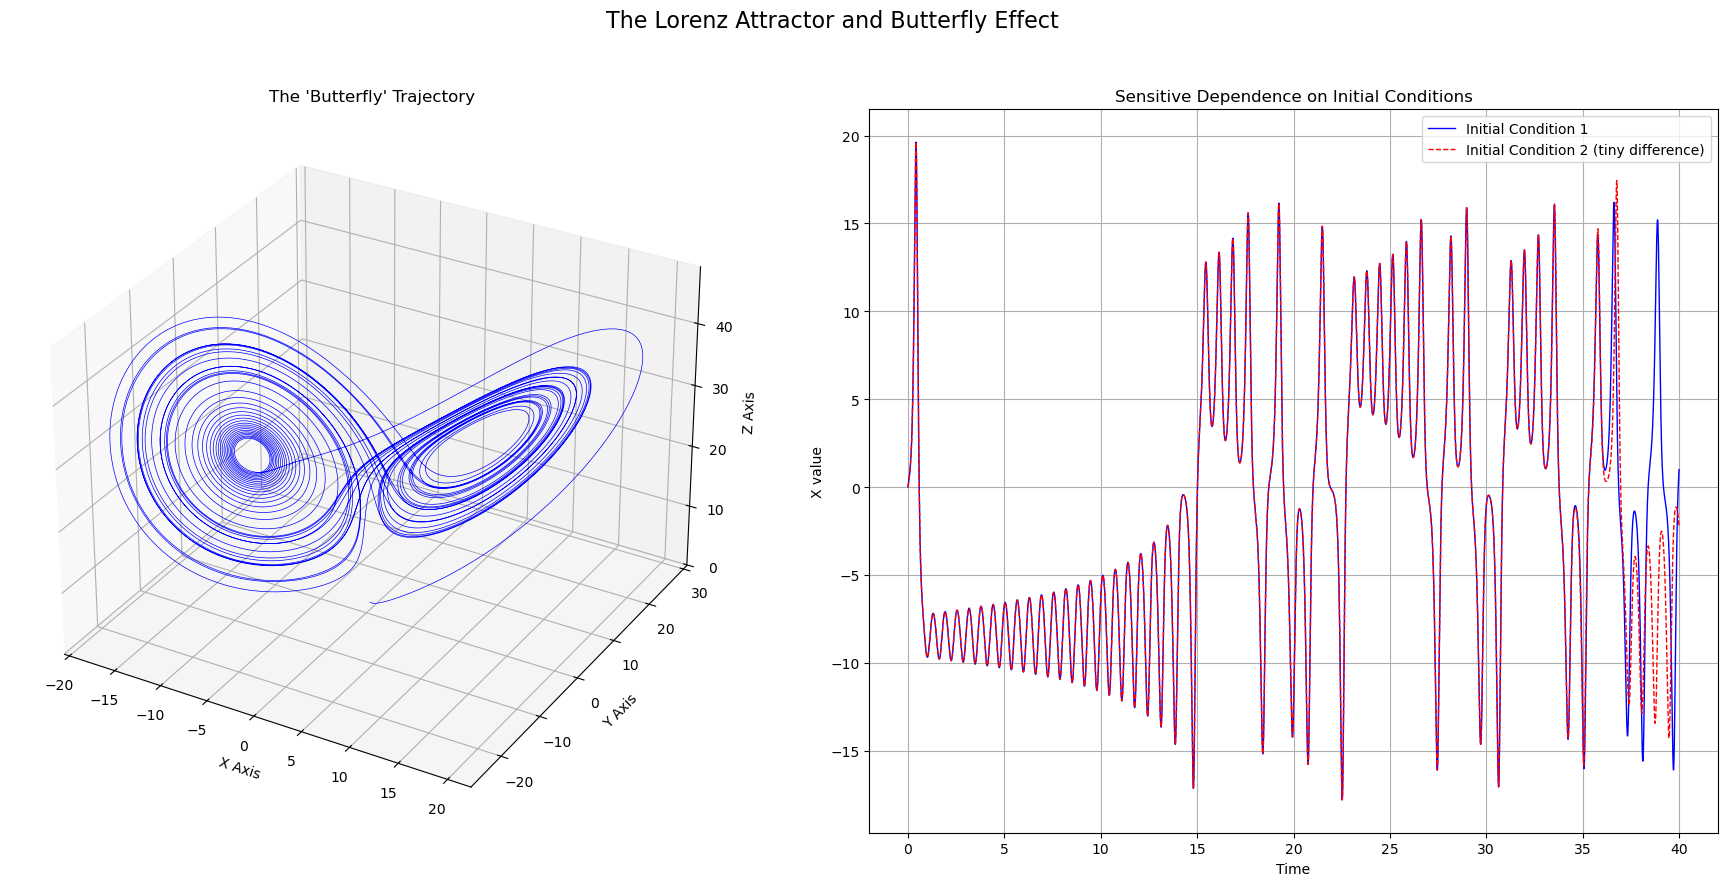

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- 洛伦兹吸引子模型 ---
# 经典参数
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# 两个极其接近的初始点
p0_1 = [0., 1., 1.05]
p0_2 = [0., 1., 1.05000001] # 初始z值只有1e-8的差异

t_span = [0, 40]
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# 微分方程定义
def lorenz(t, p):
    x, y, z = p
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# 求解
sol1 = solve_ivp(lorenz, t_span, p0_1, t_eval=t_eval)
sol2 = solve_ivp(lorenz, t_span, p0_2, t_eval=t_eval)

# --- 绘图 ---
fig = plt.figure(figsize=(18, 9))
fig.suptitle('The Lorenz Attractor and Butterfly Effect', fontsize=16)

# 图1: 3D轨迹图
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot(sol1.y[0, :], sol1.y[1, :], sol1.y[2, :], color='blue', lw=0.5)
ax1.set_xlabel("X Axis")
ax1.set_ylabel("Y Axis")
ax1.set_zlabel("Z Axis")
ax1.set_title("The 'Butterfly' Trajectory")

# 图2: 蝴蝶效应展示
ax2 = fig.add_subplot(1, 2, 2)
# 只绘制x随时间的变化
ax2.plot(sol1.t, sol1.y[0, :], 'b-', label='Initial Condition 1', lw=1)
ax2.plot(sol2.t, sol2.y[0, :], 'r--', label='Initial Condition 2 (tiny difference)', lw=1)
ax2.set_xlabel('Time')
ax2.set_ylabel('X value')
ax2.set_title('Sensitive Dependence on Initial Conditions')
ax2.legend()
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

图像解读：
左图（3D轨迹）：系统状态在三维空间中绘制出的轨迹，形成了一个奇特的、永不重复的蝴蝶形状。这个轨迹被称为 **“奇怪吸引子”**。系统永远被“吸引”在这个区域内，但永远不会在同一个点上重复。
右图（蝴蝶效应）：这是最震撼的。你会看到，在初始阶段，蓝色和红色的线几乎完全重合。但随着时间的推移，那个1e-8的微小差异被系统指数级地放大，最终导致两条线的轨迹完全分道扬镳。这深刻地揭示了为什么长期天气预报是不可能的。

六、 阻尼谐振子：从秋千到减震器

这是一个来自物理学的经典模型，它描述了一个振动系统（如弹簧上的重物、秋千）在有阻力的情况下如何运动。

核心思想/机理：
一个振动系统的运动受到三种力的共同作用：
恢复力（弹簧的力）：总想把它拉回平衡位置 (-k*x)。
阻尼力（空气阻力、摩擦力）：总与运动方向相反，试图让它停下来 (-c*v)。
驱动力（外力）：一个周期性的外力在持续地推它（F(t)）。
微分方程 (二阶常微分方程)：
m*d²x/dt²  = F(t) - c*dx/dt - k*x

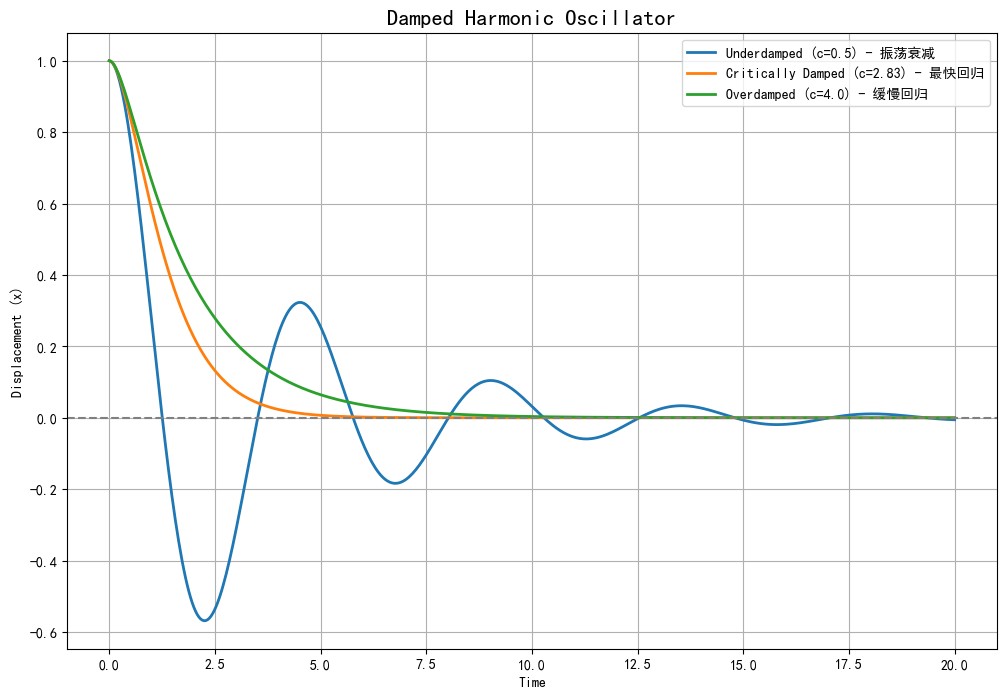

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 设置中文字体，以防绘图时出现乱码
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 解决中文字符的显示问题
plt.rcParams["axes.unicode_minus"] = False  # 解决因第一行操作而可能引发的负号显示问题


# --- 阻尼谐振子模型 ---
# 参数
m = 1.0    # 质量
k = 2.0    # 弹簧劲度系数
# 我们将改变阻尼系数c来观察不同行为
c_underdamped = 0.5   # 欠阻尼
c_critically_damped = np.sqrt(4*m*k) # 临界阻尼
c_overdamped = 4.0      # 过阻尼

# 初始条件: x(0)=1, v(0)=0 (拉开1米后释放)
y0 = [1.0, 0.0] 
t_span = [0, 20]
t_eval = np.linspace(t_span[0], t_span[1], 500)

# 微分方程定义 (需要将二阶转为一阶方程组)
# y = [x, v], dy/dt = [v, a]
def damped_oscillator(t, y, c_val):
    x, v = y
    dxdt = v
    dvdt = -(c_val/m) * v - (k/m) * x
    return [dxdt, dvdt]

# 求解三种情况
sol_under = solve_ivp(damped_oscillator, t_span, y0, args=(c_underdamped,), t_eval=t_eval)
sol_crit = solve_ivp(damped_oscillator, t_span, y0, args=(c_critically_damped,), t_eval=t_eval)
sol_over = solve_ivp(damped_oscillator, t_span, y0, args=(c_overdamped,), t_eval=t_eval)

# --- 绘图 ---
plt.figure(figsize=(12, 8))
plt.plot(sol_under.t, sol_under.y[0], label=f'Underdamped (c={c_underdamped}) - 振荡衰减', lw=2)
plt.plot(sol_crit.t, sol_crit.y[0], label=f'Critically Damped (c={c_critically_damped:.2f}) - 最快回归', lw=2)
plt.plot(sol_over.t, sol_over.y[0], label=f'Overdamped (c={c_overdamped}) - 缓慢回归', lw=2)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Damped Harmonic Oscillator', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Displacement (x)')
plt.legend()
plt.grid(True)
plt.show()

图像解读：

欠阻尼 (Underdamped)：蓝色线。阻力很小，系统会像秋千一样来回振荡，但振幅会逐渐减小，最终停在平衡位置。
过阻尼 (Overdamped)：橙色线。阻力非常大，系统甚至无法完成一次完整的振荡，就像陷在糖浆里一样，极其缓慢地回归到平衡位置。
临界阻尼 (Critically Damped)：绿色线。这是一个完美的平衡点。系统以最快的速度回归到平衡位置，且不产生任何振荡。汽车的减震器就是按照这个原理设计的，目标就是在过坎后让车身尽快稳定下来，而不是来回晃动。